Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria de Vibrações



# Trabalho 2.2


### Aluna: Caroline Molin do Amaral (Matrícula: 00312125)

### Professor Dr. Marcelo Maia Rocha 
---

## Sumário

[1.   Introdução](#section_1)  
[2.   Frequências Naturais e Modos de Vibração](#section_2)  
[3.   Resposta da Estrutura a um Impulso](#section_3)  
[4.   Cálculo dos Coeficientes de Amortecimento](#section_4)  
[5.   Considerações Finais](#section_5)  


In [1]:
# Importação dos módulos requeridos para esse trabalho

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import pickle as pk

with open('Dados/sample_KM.pk', 'rb') as target:
    K1, M1 = pk.load(target)


## 1. Introdução <a name="section_1"></a> 

O presente trabalho tem como objetivo analisar uma estrutura reticulada com uma dimensão predominante, a fim de determinar suas frquências naturais e modos de vibração, a partir da aplicação sucessiva de uma carga unitária em seus nós livres. O objeto de estudo para esse caso consiste em uma treliça com 11 nós livres, modelada no software "Ftool". A estrutura, bem como suas dimensões e propriedades encontram-se esquematizadas na Figura 1. 

<img src="Imagens/Estrutura.JPG" alt="Treliça Isostática" width="1000px"/>

Ao longo deste trabalho também será feita a análise da estrutura frente à ação de um carregamento impulsivo, calculando os parâmetros de ângulo de fase e amplitudes nos nós. Finalmente, serão também calculados os coeficientes de amortecimento para cada um dos modos de vibração. 

## 2. Frequências Naturais e Modos de Vibração <a name="section_2"></a> 

Primeiramente foi necessário obter a matriz de rigidez $\mathbf{K}$ da estrutura, através do inverso de sua matriz de flexibilidade $\mathbf{H}$, a qual consiste em uma matriz 11x11 contendo os deslocamentos nos nós livres para cada aplicação de carga unitária, divididos pelo módulo desta. Além disso, obteve-se a da matriz de massa concentrada $\mathbf{M}$, considerando uma massa distribuída de 2.500 kg/m para a estrutura. A partir destas matrizes, as frequências naturais e modos de vibração são obtidos por meio de uma resolução de problema de autovalores e autovetores. Para isso, utiliza-se recursos da biblioteca ```scipy```.

In [2]:
# Uso das função eig do módulo linalg para obter autovalores e autovetores
w21, Phi1 = sc.eig(K1, M1)

# Ordenando
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Cálculo das frequências naturais
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi

A partir das funções descritas anteriormente, prossegue-se para a obtenção das primeiras 4 frequências naturais e visualização dos primeiros 4 modos de vibração.

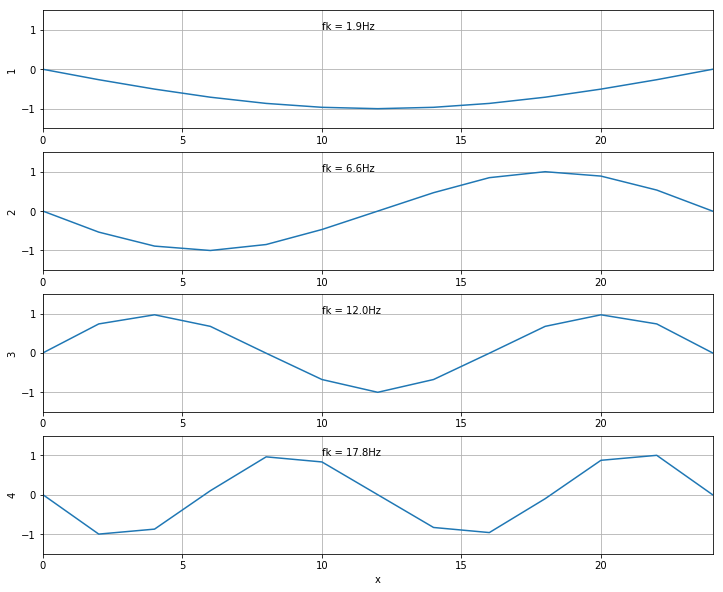

In [3]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 26, 2)

for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 24.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


## 3. Resposta da Estrutura  um Impulso <a name="section_3"></a> 

Para a análise da estrutura perante uma força impulsiva, será considerada uma força $F_0 = 30 kN$ atuando no sistema durante um intervalo $T_d = \frac{T_n}{4}$. Assim, monta-se o vetor velocidade inicial $v_0$, aplicando o impulso no nó 6, o nó central da estrutura.  

In [4]:
f_maxima = np.max(fk1)
print('Força Máxima:\n','fmax=', f_maxima)
F0 = 30000
Tn = 1/f_maxima
td = Tn/4
m = 2500
v0 = F0*td/m 
print('Velocidade Inicial:\n', 'v0=', v0)

v0_vetor = [0, 0, 0, 0, 0, v0, 0, 0, 0, 0, 0]
u0_vetor = np.zeros(11)

Força Máxima:
 fmax= 40.67482534120696
Velocidade Inicial:
 v0= 0.07375569470388732


Considerando que o deslocamento inicial é nulo, $u_0 = 0$, sabe-se que os ângulos de fase serão $\theta_{\rm i} = \frac {\pi}{2}$ e, a partir das funções descritas, encontram-se os valores de amplitude $u_{max}$ para a velocidade $v_0$ aplicada no nó escolhido, o nó central da estrutura. 

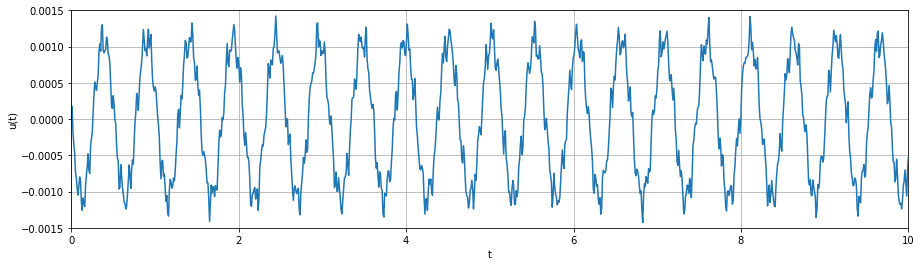

In [5]:
#Cálculo da transposta da matriz Phi (autovalores)
Phit = Phi1
for k in range(10):
    Phit[k] = Phi1[k].transpose()
    
xi = np.pi/2
u_maximo = np.zeros(11)

for k in range(11):
    Mi = np.dot(np.dot(Phit[k], M1), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1), v0_vetor)) / (wk1[k]*np.sin(xi)*Mi)
    u_maximo[k] = umax

t = np.linspace(0,10,1000)
uk = np.zeros((11,1000))

#Cálculo da amplitude u (equação da resposta de um nó amortecido a condições iniciais)
for k in range(11):
    uk[k,:] = u_maximo[k]*np.cos(-wk1[k]*t - np.pi/2)

u = np.dot(Phi1, uk)

#Plotando o nó com maior deslocamento (nó 6, central)
plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:])  
plt.xlim(0.0,10.0)
plt.xlabel("t")
plt.ylim(-0.0015,0.0015)
plt.ylabel("u(t)")
plt.grid(True)
    


## 4. Cálculo dos Coeficientes de Amortecimento <a name="section_4"></a>

Utilizando o modelo de Rayleigh, no qual a matriz de amortecimento $\mathbf{C}$ consiste em uma combinação linear da matriz de rigidez $\mathbf{K}$ e de massa $\mathbf{M}$ da estrutura e assumindo um coeficiente de amortecimento $\zeta = 0.01$ para os dois primeiros modos de vibração, obtêm-se os valores de $\zeta$ dos demais modos através da seguinte equação: 

$$\zeta_k = \frac{\alpha_0}{2\omega_k} + \frac{\alpha_1\omega_k}{2}$$


In [6]:
zeta = np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alfa_1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa_0 = 2*zeta[0]*wk1[0]-alfa_1*wk1[1]**2

#Cálculo dos coeficientes de amortecimento a partir de alfa 0, alfa 1, zeta 0 e zeta 1
for k in range(9):
    zeta[k+2] = (alfa_0/(2*wk1[k+2]))+(alfa_1*wk1[k+2]/2)

print('Valores do coeficiente de amortecimento zeta para cada modo de vibração:\n', zeta)

Valores do coeficiente de amortecimento zeta para cada modo de vibração:
 [0.01       0.01       0.01133819 0.01904313 0.02451955 0.03130875
 0.03485307 0.0404744  0.04131448 0.04540231 0.04670235]


## 5. Considerações Finais <a name="section_5"></a>

A realização deste trabalho viabilizou a aplicação dos conceitos de vibração em um sistema com múltiplos graus de liberdade em um problema mais real. Por meio da modelagem da estrutura de treliça adotada e aplicação sucessiva de um carregamento unitário nos nós livres da estrutura, foi possível observar como uma estrutura com uma dimensão predominante se comporta, em termos de deslocamentos. Posteriormente, após a obtenção das matrizes de rigidez e massa, foi possível visualizar os modos de vibração e frequências naturais dessa estrutura. Ademais, conseguiu-se observar as amplitudes de vibração de um dos nós livres da estrutura sujeito à imposição de uma carga impulsiva, por meio da aplicação de uma velocidade inicial $v_0$. Por fim, utilizando o modelo de amortecimento de Rayleigh se obtiveram os valores de coeficiente de amortecimento $\zeta$ para todos os modos de vibração da estrutura. Nessa etapa se observou um aumento nos valores de um modo para outro. 